<a href="https://colab.research.google.com/github/taiynlee/Kubernetes-CN/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
深度學習
梯度下降在微分時最重要的是連鎖法則
把連續相乘的函數個別分開計算
徧微分的目的是在固定一個像限
只計算單一象限對最後結果的影響
中間層一律relu 因為其他函數會造成梯度消失
一、最後二分的激活函數 sigmoid
二、最後多個選項 機率合為一 softmax
三、tanh為-1到1之間的s型函數

tensorflow2.0跟1.0的區別就是把keras整合進去 也不用再裝tensorflow gpu 它會自動偵測

SyntaxError: ignored

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train,y_train),(x_test,y_test))
(x_train,y_train),(x_test,y_test)=load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


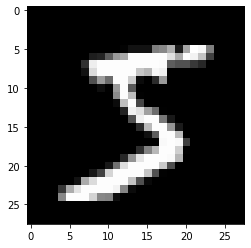

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#cmap色系
plt.imshow(x_train[0],cmap="gray")

In [6]:
from tensorflow.keras.models import Sequential
#model的二種堆疊方式 sequential是往上疊 model相對來說比較自由疊
from tensorflow.keras.layers import Dense
layers=[
        Dense(128,activation="relu", input_dim=784),
        Dense(10,activation="softmax")
]
model=Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 分類問題 一律選擇交叉熵
# 熵:p*log(1/p)->Gini:p*(1-p)
# 交叉熵 categorical(多元):p1*log(1/q1)+p2*log(1/q2).....
# binary(一個神經元)[sigmoid:0-1]:p*log(1/q)+(1-p)*log(1/1-q)

# 動態步長 一開始步大 愈後面步小
# 動量優化 局部最小值與全局最小值 一、動量優化 速度 動能轉位能 能量轉換 二、能量消耗 磨擦力
# 上述二點合在一起使用叫做adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [8]:
model.compile(loss=CategoricalCrossentropy(),optimizer="adam",metrics=["accuracy"])

In [9]:
# 攤平
# normalize 0:黑 1:白
# 每一個框架有假設輸入區間 tensorflow假設的區間是-1到1之間
x_train.reshape(60000,784).shape
x_train_norm=x_train.reshape(60000,784)/255

In [10]:
x_test_norm=x_test.reshape(-1,784)/255

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# validation_split:另外留下一些訓練資料來看模型好不好
# batch_size 看多少比做一次平均梯度下降 比如問路時 不要聽一個說就走 一次聽多一點人的意見再走
# epochs:整份資料看幾遍 在這邊一個epoch就270次
# log的詳細程度 1:詳細 2:沒有 3:必要
model.fit(x_train_norm,y_train_cat,validation_split=0.1,batch_size=200,epochs=1,verbose=2)

270/270 - 1s - loss: 0.4448 - accuracy: 0.8802 - val_loss: 0.1977 - val_accuracy: 0.9468


In [13]:
# 觀察模型好不好 只要看val_loss 愈小愈好
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
c=[ModelCheckpoint("mlp.h5",save_best_only=True),
   EarlyStopping(patience=3,restore_best_weights=True)]
model.fit(x_train_norm,y_train_cat,validation_split=0.1,batch_size=200,epochs=50,verbose=2,callbacks=c)

Epoch 1/50
270/270 - 1s - loss: 0.2050 - accuracy: 0.9418 - val_loss: 0.1434 - val_accuracy: 0.9607
Epoch 2/50
270/270 - 1s - loss: 0.1524 - accuracy: 0.9561 - val_loss: 0.1229 - val_accuracy: 0.9652
Epoch 3/50
270/270 - 1s - loss: 0.1196 - accuracy: 0.9661 - val_loss: 0.1072 - val_accuracy: 0.9692
Epoch 4/50
270/270 - 1s - loss: 0.0984 - accuracy: 0.9716 - val_loss: 0.0933 - val_accuracy: 0.9740
Epoch 5/50
270/270 - 1s - loss: 0.0835 - accuracy: 0.9758 - val_loss: 0.0852 - val_accuracy: 0.9763
Epoch 6/50
270/270 - 1s - loss: 0.0713 - accuracy: 0.9799 - val_loss: 0.0841 - val_accuracy: 0.9762
Epoch 7/50
270/270 - 1s - loss: 0.0616 - accuracy: 0.9827 - val_loss: 0.0808 - val_accuracy: 0.9758
Epoch 8/50
270/270 - 1s - loss: 0.0542 - accuracy: 0.9852 - val_loss: 0.0756 - val_accuracy: 0.9772
Epoch 9/50
270/270 - 1s - loss: 0.0464 - accuracy: 0.9877 - val_loss: 0.0731 - val_accuracy: 0.9785
Epoch 10/50
270/270 - 1s - loss: 0.0406 - accuracy: 0.9895 - val_loss: 0.0763 - val_accuracy: 0.9785

In [14]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9765


[0.07551062107086182, 0.9764999747276306]

In [15]:
from sklearn.metrics import confusion_matrix
# predict:原本predict_proba
# predict_classes:原本的predict
pre=model.predict_classes(x_test_norm)
mat=confusion_matrix(y_test,pre)
pd.DataFrame(mat,columns=["{}(預測值)".format(i) for i in range(10)],index=["{}(正確值)".format(i) for i in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測值),1(預測值),2(預測值),3(預測值),4(預測值),5(預測值),6(預測值),7(預測值),8(預測值),9(預測值)
0(正確值),965,0,2,0,0,2,3,4,2,2
1(正確值),0,1127,1,1,0,1,2,0,3,0
2(正確值),4,4,995,6,1,1,2,8,11,0
3(正確值),0,0,2,989,0,6,0,2,5,6
4(正確值),2,0,2,1,962,0,1,3,2,9
5(正確值),3,1,0,12,1,865,4,1,4,1
6(正確值),3,2,2,1,7,6,937,0,0,0
7(正確值),0,4,7,4,1,0,0,1002,5,5
8(正確值),2,0,2,6,3,4,2,5,947,3
9(正確值),1,3,0,7,10,4,0,7,1,976


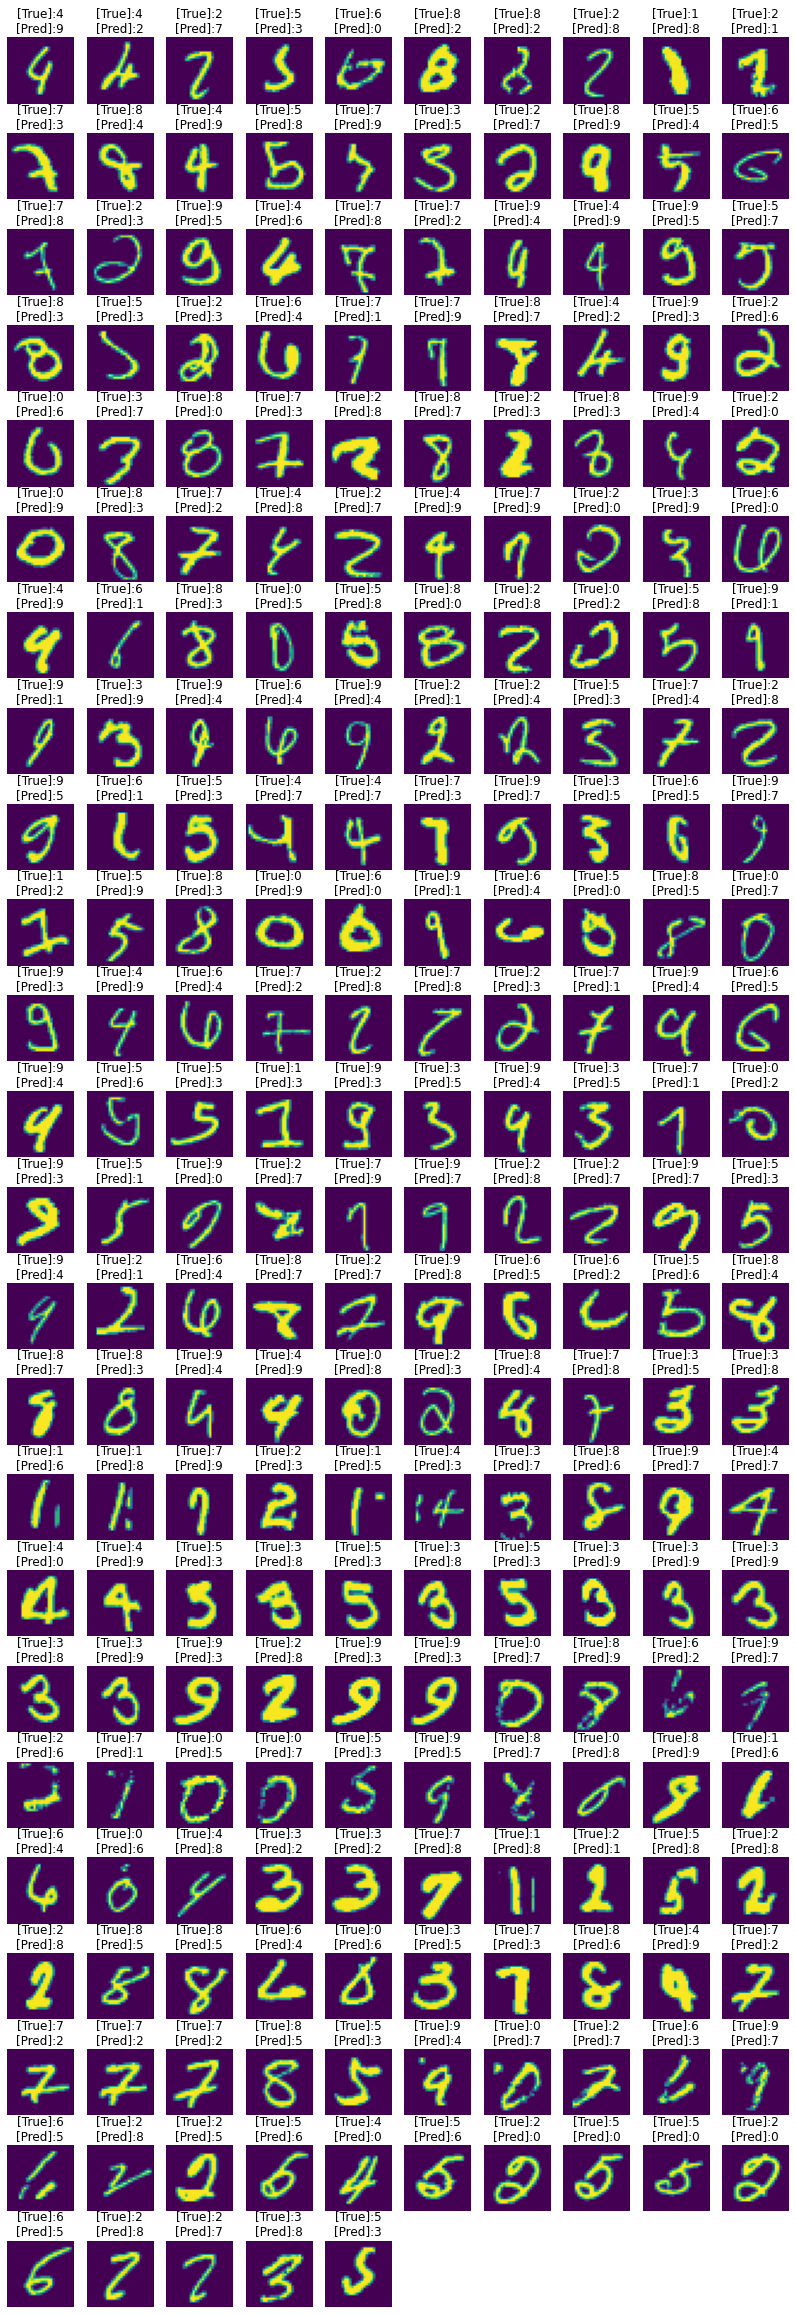

In [16]:
# subplot(總高度,總寬度,i+h)
import numpy as np
idx=np.nonzero(pre!=y_test)[0]
false_label=y_test[idx]
false_pred=pre[idx]
false_img=x_test[idx]

plt.figure(figsize=(14,42))
width=10
height=len(idx)//width+1

for i,img in enumerate(false_img):
  plt.subplot(height,width,i+1)
  t="[True]:{}\n[Pred]:{}".format(false_label[i],false_pred[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img)

In [17]:
# 儲存:model.save("xxx.h5")
# 讀取:不需要重新compile() 後面直接接fit/predict
# PIL,opencv
from tensorflow.keras.models import load_model
model_load=load_model("mlp.h5")
model_load.evaluate(x_test_norm,y_test_cat)

from tensorflow.keras.preprocessing.image import load_img
fp=input("檔名:")
img=load_img(fp,target_size=(28,28)).convert("L") #灰階的意思 1:黑白
img_np=np.array(img)
img_norm=img_np.reshape(1,784)/255
answer=model.predict_classes(img_norm)[0]
proba=model.predict(img_norm)[0]
print("答案是:",answer)
print("機率:",proba)
plt.imshow(img_np)

KeyboardInterrupt: ignored

In [ ]:
# imagenet李菲菲的網站